In [1]:
import numpy as np
import pandas as pd
import pyspark as ps
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
df07 = spark.read.csv('2007/2007_data.csv', header=True, sep=",", inferSchema=True)

In [3]:
df07.createOrReplaceTempView('owners_07')

In [4]:
simple_07 = spark.sql('''
    SELECT FIPST AS state, SECTOR AS sector, 
            IFNULL(ETH1, "N/A") AS ethnicity, 
            IFNULL(RACE1, "U") AS race, 
            IFNULL(SEX1, "U") AS sex, 
            IFNULL(ESTABLISHED, 0) AS year,
            IFNULL(EMPLOYMENT_NOISY, 1) AS employees
    FROM owners_07
    ''')

In [5]:
simple_07.show(41)

+-----+------+---------+----+---+----+---------+
|state|sector|ethnicity|race|sex|year|employees|
+-----+------+---------+----+---+----+---------+
|   23|    51|        N|   W|  M|   1|        9|
|   23|    44|        N|   W|  M|   1|       74|
|   23|    55|        N|   W|  M|   1|        2|
|   23|    54|        N|   W|  M|   1|       34|
|   23|    51|        N|   W|  M|   1|      120|
|   23|    42|        N|   W|  M|   1|      110|
|   23|    44|        N|   W|  M|   0|       14|
|   23|    44|        N|   W|  M|   1|       14|
|   23|    44|        N|   W|  M|   1|       34|
|   23|    42|        N|   W|  M|   1|      280|
|   23|    31|        N|   W|  M|   1|       34|
|   23|    31|        N|   W|  M|   1|       10|
|   23|    22|        N|   W|  M|   1|        4|
|   23|    31|        N|   W|  M|   1|       74|
|   23|    54|        N|   W|  M|   1|        0|
|   23|    71|        N|   W|  M|   1|       14|
|   23|    44|        N|   W|  M|   1|       14|
|   23|    31|      

In [6]:
data2007 = simple_07.toPandas()
data2007.to_csv(r'2007/2007_slim_data.csv')

In [7]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165680 entries, 0 to 2165679
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   sector     int32 
 2   ethnicity  object
 3   race       object
 4   sex        object
 5   year       object
 6   employees  int32 
dtypes: int32(2), object(5)
memory usage: 99.1+ MB


In [8]:
data2007['year'] = 2007

In [9]:
data2007['year'] = pd.to_numeric(data2007['year'])

In [10]:
# Leaving state as object because code is alpha-numeric.  Ex. S1, S2, S3, S4.

In [11]:
data2007['race1'] = data2007['race'].str.slice(stop=1)

In [12]:
data2007['race2'] = data2007['race'].str.slice(start=1).str.strip()

In [13]:
data2007.race1.unique()

array(['W', 'A', 'I', 'B', 'S', 'P'], dtype=object)

In [14]:
# Race classification is designated by:
# W – WHITE 
# B – BLACK
# I – AIAN (AMERICAN INDIAN AND ALASKA NATIVE)
# A – ASIAN (AN AGGREGATION OF DETAILED ASIAN GROUPS)
# P – NHOPI (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER) 
# S – SOR (SOME OTHER RACE)

In [15]:
data2007.race2.unique()

array(['', 'A', 'I', 'B', 'S', 'P'], dtype=object)

In [16]:
# data2007['race2'] = data2007['race2'].str.strip()

In [17]:
data2007.race2.unique()

array(['', 'A', 'I', 'B', 'S', 'P'], dtype=object)

In [18]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165680 entries, 0 to 2165679
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   sector     int32 
 2   ethnicity  object
 3   race       object
 4   sex        object
 5   year       int64 
 6   employees  int32 
 7   race1      object
 8   race2      object
dtypes: int32(2), int64(1), object(6)
memory usage: 132.2+ MB


In [19]:
data2007.sector.unique()

array([51, 44, 55, 54, 42, 31, 22, 71, 56, 23, 52, 11, 72, 81, 53, 48, 62,
       21, 61, 99], dtype=int32)

In [20]:
def plotdemo(data, col):
    fig, ax = plt.subplots(figsize=(20,5))
    ax.hist(data[col]);

In [21]:
len(data2007[data2007['sector'] == 54])

294882

In [22]:
# 'pst' stands for Professional, Science, and Technical Services.  Sector 54 is the NAICS code for that industry title.

In [23]:
pst_data_07 = data2007[data2007['sector'] == 54]

In [24]:
pst_data_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294882 entries, 3 to 2165665
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   state      294882 non-null  object
 1   sector     294882 non-null  int32 
 2   ethnicity  294882 non-null  object
 3   race       294882 non-null  object
 4   sex        294882 non-null  object
 5   year       294882 non-null  int64 
 6   employees  294882 non-null  int32 
 7   race1      294882 non-null  object
 8   race2      294882 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 20.2+ MB


In [25]:
pst_df = pst_data_07.groupby(['race1', 'race2','ethnicity','sex']).agg({'sector':'count'})

In [26]:
pst_percent = pst_df.groupby(level=0).apply(lambda x: 100 * x / float(sum(pst_df['sector'])))
pst_percent.rename(columns={'sector':'percent'},inplace=True)
pst_percent

percent
race1 race2 ethnicity sex           
A           H         F     0.035268
                      M     0.059346
            N         F     2.040477
                      M     4.439403
      P     H         F     0.001696
                      M     0.000678
            N         F     0.011191
                      M     0.017634
      S     N         F     0.013904
                      M     0.030521
B           H         F     0.062398
                      M     0.100040
            N         F     1.660325
                      M     2.694298
      A     H         F     0.003052
                      M     0.002374
            N         F     0.015939
                      M     0.019669
      I     H         F     0.002035
                      M     0.002713
            N         F     0.020008
                      M     0.019669
      P     N         F     0.001017
                      M     0.001017
      S     H         F     0.000339
                      M     0.000339
            N         F     0.003730
                      M     0.004069
I           H         F     0.027469
                      M     0.047477
            N         F     0.178716
                      M     0.380152
      A     H         F     0.000678
                      M     0.001017
            N         F     0.006443
                      M     0.010852
      P     H         M     0.000339
            N         F     0.000678
                      M     0.001356
      S     H         M     0.000678
            N         F     0.000339
                      M     0.000339
P           H         F     0.001696
                      M     0.005765
            N         F     0.040016
                      M     0.067146
      S     N         M     0.000678
S           H         F     0.011869
                      M     0.014243
            N         F     0.041712
                      M     0.086814
W           H         F     1.718993
                      M     3.142952
            N         F    23.916685
                      M    57.724785
      A     H         F     0.012887
                      M     0.013904
            N         F     0.177020
                      M     0.277399
      B     H         F     0.045442
                      M     0.055276
            N         F     0.080371
                      M     0.138700
      I     H         F     0.018652
                      M     0.017634
            N         F     0.123439
                      M     0.219749
      P     H         F     0.001017
                      M     0.003052
            N         F     0.020008
                      M     0.028147
      S     H         F     0.007800
                      M     0.012887
            N         F     0.021025
                      M     0.032555

In [27]:
race07 = pst_percent.groupby(level=0).agg({'percent':'sum'})
race07.sort_values('percent',ascending=False,inplace=True)
race07.reset_index(inplace=True)
race07.rename(columns={'race1':'race'},inplace=True)

In [28]:
race07['race'] = np.array(['White','Asian','Black or African American','American Indian and Alaska Native', 'Some other race', 'Native Hawaiian and Other Pacific Islander'])
race07

,race,percent
0,White,87.810378
1,Asian,6.650118
2,Black or African American,4.613032
3,American Indian and Alaska Native,0.656534
4,Some other race,0.154638
5,Native Hawaiian and Other Pacific Islander,0.115300


In [29]:
race07.sum()

race       WhiteAsianBlack or African AmericanAmerican In...
percent                                                100.0
dtype: object

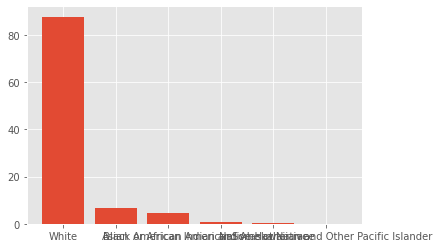

In [30]:
x = np.arange(len(race07['race']))

fig, ax = plt.subplots()

ax.bar(x, race07['percent'])
ax.set_xticks(x)
ax.set_xticklabels(race07['race']);

In [31]:
zoom_race07 = race07[race07['race'] != 'W']
zoom_race07

,race,percent
0,White,87.810378
1,Asian,6.650118
2,Black or African American,4.613032
3,American Indian and Alaska Native,0.656534
4,Some other race,0.154638
5,Native Hawaiian and Other Pacific Islander,0.115300


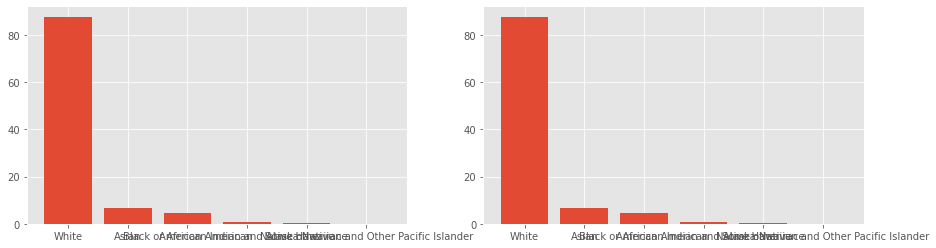

In [32]:
x = np.arange(len(race07['race']))
x2 = np.arange(len(zoom_race07['race']))

fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].bar(x, race07['percent'])
ax[0].set_xticks(x)
ax[0].set_xticklabels(race07['race']);

ax[1].bar(x2, zoom_race07['percent'])
ax[1].set_xticks(x2)
ax[1].set_xticklabels(zoom_race07['race']);

In [35]:
eth07 = pst_percent.groupby(level=2).agg({'percent':'sum'})
eth07.reset_index(inplace=True)
eth07

,ethnicity,percent
0,H,5.432003
1,N,94.567997


In [34]:
sex07 = pst_percent.groupby(level=3).agg({'percent':'sum'})
sex07.reset_index(inplace=True)
sex07

,percent
sex,
F,30.324333
M,69.675667


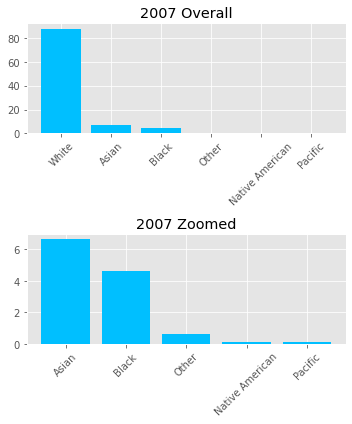

In [38]:
zoom_race07 = race07[race07['race'] != 'White']
x = np.arange(len(race07['race']))
x2 = np.arange(len(zoom_race07['race']))
xlist = ['White','Asian','Black', 'Other', 'Native American', 'Pacific']
fig, ax = plt.subplots(2,1,figsize=(5,6))

ax[0].bar(x, race07['percent'], color='deepskyblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(xlist);

plt.setp(ax[0].get_xticklabels(), rotation=45);

ax[1].bar(x2, zoom_race07['percent'], color='deepskyblue')
ax[1].set_xticks(x2)
ax[1].set_xticklabels(xlist[1:]);

plt.setp(ax[1].get_xticklabels(), rotation=45);

ax[0].set_title("2007 Overall");
ax[1].set_title("2007 Zoomed");
fig.tight_layout()
plt.savefig('2007_racez.png')